<a href="https://colab.research.google.com/github/shivampip/NotDog/blob/master/shiv_on_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dog or Not Dog [shiv]

In [0]:
! git clone https://www.github.com/shivampip/NotDog

Cloning into 'NotDog'...
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 6706 (delta 0), reused 2 (delta 0), pack-reused 6702
Receiving objects: 100% (6706/6706), 162.47 MiB | 35.47 MiB/s, done.
Resolving deltas: 100% (44/44), done.
Checking out files: 100% (6511/6511), done.


In [0]:
cd NotDog

/content/NotDog


In [0]:
from imgdata import ImgData
import numpy as np

Total 4000 image files found


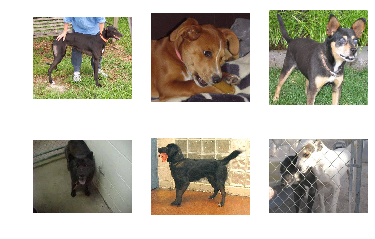

In [0]:
idog= ImgData("data/dog/")
idog.get_all_files()
idog.plot_raw_sample(rows= 2, cols= 3)

In [0]:
dog_data = idog.process(size=(150,150), count= 4000, silent= True)

Resizing DONE
Converting to NP DONE


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


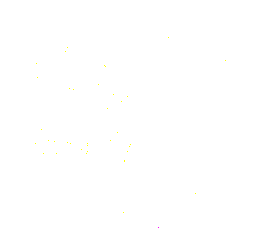

In [0]:
idog.plot_np_imgs(dog_data)

Total 2500 image files found


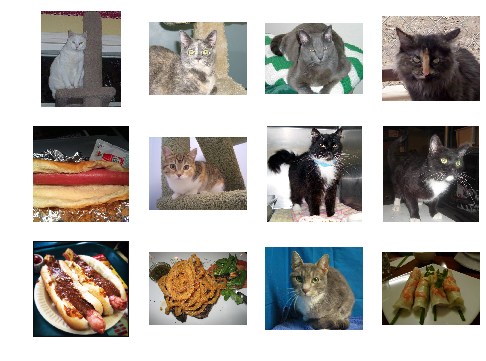

In [0]:
indog= ImgData("data/notdog/")
indog.get_all_files()
indog.plot_raw_sample(rows= 3, cols= 4)

In [0]:
ndog_data = indog.process(size=(150,150), count= 2500, silent= True)

Resizing DONE
Converting to NP DONE


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


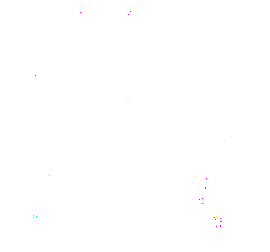

In [0]:
indog.plot_np_imgs(ndog_data)

### Combining

In [0]:
y_dog= np.zeros((dog_data.shape[0], 1))
y_ndog= np.ones((ndog_data.shape[0], 1))
print(y_dog.shape, y_ndog.shape)

(4000, 1) (2500, 1)


In [0]:
X, y= idog.shuffle([(dog_data, y_dog), (ndog_data, y_ndog)])

In [0]:
X/=255.0

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X, y, shuffle= True)

In [0]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4875, 150, 150, 3)
(4875, 1)
(1625, 150, 150, 3)
(1625, 1)


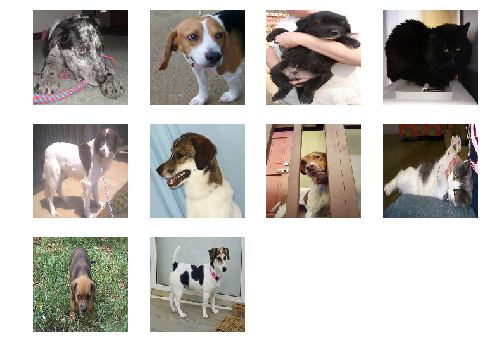

[[0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]]


In [0]:
idog.plot_np_imgs(X_train, count=10)
print(y_train[:10])

## Model Building

In [0]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model

In [0]:
img_input= layers.Input(shape=(150, 150, 3))

In [0]:
x= layers.Conv2D(16, 3, activation='relu')(img_input)

In [0]:
x= layers.MaxPool2D(2)(x)

In [0]:
x= layers.Conv2D(32, 3, activation='relu')(x)

In [0]:
x= layers.MaxPool2D(2)(x)

In [0]:
x= layers.Conv2D(64, 3, activation='relu')(x)

In [0]:
x= layers.MaxPool2D(2)(x)

In [0]:
x= layers.Flatten()(x)

In [0]:
x= layers.Dense(512, activation='relu')(x)

In [0]:
output= layers.Dense(1, activation='sigmoid')(x)

In [0]:
model= Model(img_input, output)

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 17, 17, 64)        0         
__________

In [0]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

In [0]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Train on 4875 samples, validate on 1625 samples
Epoch 1/10
4875/4875 [==============================] - 7s 1ms/sample - loss: 0.7176 - acc: 0.6308 - val_loss: 0.6509 - val_acc: 0.6431
Epoch 2/10
4875/4875 [==============================] - 7s 1ms/sample - loss: 0.5545 - acc: 0.7099 - val_loss: 0.5834 - val_acc: 0.7188
Epoch 3/10
4875/4875 [==============================] - 7s 1ms/sample - loss: 0.4789 - acc: 0.7711 - val_loss: 0.4851 - val_acc: 0.7563
Epoch 4/10
4875/4875 [==============================] - 7s 1ms/sample - loss: 0.4221 - acc: 0.8049 - val_loss: 0.5272 - val_acc: 0.7422
Epoch 5/10
4875/4875 [==============================] - 7s 1ms/sample - loss: 0.3522 - acc: 0.8351 - val_loss: 0.5379 - val_acc: 0.7569
Epoch 6/10
4875/4875 [==============================] - 7s 1ms/sample - loss: 0.2873 - acc: 0.8806 - val_loss: 0.8734 - val_acc: 0.7366
Epoch 7/10
4875/4875 [==============================] - 7s 1ms/sample - loss: 0.2246 - acc: 0.9116 - val_loss: 0.9563 - val_acc: 0.7458


In [0]:
model.evaluate(X_test, y_test)

1625/1625 [==============================] - 1s 482us/sample - loss: 0.9423 - acc: 0.7563


[0.9423068204292884, 0.7563077]